# Entropia do Inglês

Vamos aproximar a entropia do Inglês. Para tanto iremos utilizar o texto Ulysses de James Joyce. Quanto maior o texto (ou conjunto de textos), melhor será nossa aproximação. 

Vamos inicialmente baixar o texto do Projeto Gutenberg.

In [2]:
wget -q http://www.gutenberg.org/files/4300/4300-0.txt -O /tmp/ulysses.txt

Podemos facilmente verificar o número de linhas e caracteres desse texto.

In [8]:
wc -lc /tmp/ulysses.txt 

  33185 1586393 /tmp/ulysses.txt


Vamos ver um trecho desse texto.

In [10]:
head -c 1250 /tmp/ulysses.txt | tail -c 361

Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of
lather on which a mirror and a razor lay crossed. A yellow
dressinggown, ungirdled, was sustained gently behind him on the mild
morning air. He held the bowl aloft and intoned:

—_Introibo ad altare Dei_.

Halted, he peered down the dark winding stairs and called out coarsely:


Inicialmente, iremos assumir que a fonte produz uma sequência de caracteres e que esta sequência é i.i.d. (independente e identicamente distribuída). É uma suposição errônea, como veremos adiante, mas simplifica o problema. Além disso, para simplificar, iremos supor que letras maiúsculas e minúsculas são equivalentes.

Usando esta última suposição, vamos transformar as maiúsculas em minúsculas. 

Veremos os resultados inicialmente apenas nesse trecho visualizado acima e depois obteremos o resultado para todo o texto.

In [11]:
head -c 1250 /tmp/ulysses.txt | tail -c 361 | tr 'A-Z' 'a-z'

stately, plump buck mulligan came from the stairhead, bearing a bowl of
lather on which a mirror and a razor lay crossed. a yellow
dressinggown, ungirdled, was sustained gently behind him on the mild
morning air. he held the bowl aloft and intoned:

—_introibo ad altare dei_.

halted, he peered down the dark winding stairs and called out coarsely:


Vamos agora fazer mais uma simplificação: desconsiderar os caracteres diferentes de [a-z].

In [12]:
head -c 1250 /tmp/ulysses.txt | tail -c 361 | tr 'A-Z' 'a-z' | tr -dc 'a-z' 

statelyplumpbuckmulligancamefromthestairheadbearingabowloflatheronwhichamirrorandarazorlaycrossedayellowdressinggownungirdledwassustainedgentlybehindhimonthemildmorningairheheldthebowlaloftandintonedintroiboadaltaredeihaltedhepeereddownthedarkwindingstairsandcalledoutcoarsely

Precisamos agora contabilizar quantas vezes cada caractere apareceu. Para tanto vamos dispor cada caractere em uma linha, depois ordená-los e contar. 

Para melhor visualização, vamos exibir as 10 primeiras linhas.

In [20]:
head -c 1250 /tmp/ulysses.txt | tail -c 361 | tr 'A-Z' 'a-z' | tr -dc 'a-z' | \
sed 's/\(.\)/\1\n/g' | head

s
t
a
t
e
l
y
p
l
u


Em seguida vamos ordenar alfabéticamente. 

Vamos ilustrar a ordenação sobre essa 10 linhas primeiro.

In [21]:
head -c 1250 /tmp/ulysses.txt | tr 'A-Z' 'a-z' | tr -dc 'a-z' | \
sed 's/\(.\)/\1\n/g' | head | sort

c
e
e
h
j
o
p
r
t
t


E agora o resultado da ordenação sobre todos o trecho.

In [22]:
head -c 1250 /tmp/ulysses.txt | tr 'A-Z' 'a-z' | tr -dc 'a-z' | \
sed 's/\(.\)/\1\n/g' | sort | column -c 80 | head

a	c	e	e	i	l	o	r	s	t
a	c	e	e	i	l	o	r	s	u
a	c	e	e	i	l	o	r	s	u
a	c	e	f	i	l	o	r	s	u
a	c	e	f	i	l	o	r	s	u
a	c	e	f	i	l	o	r	s	u
a	c	e	f	i	l	o	r	s	u
a	c	e	f	i	l	o	r	s	u
a	c	e	f	i	l	o	r	s	u
a	c	e	f	i	l	o	r	s	u


E agora vamos contabilizar as ocorrências.

In [24]:
head -c 1250 /tmp/ulysses.txt | tr 'A-Z' 'a-z' | tr -dc 'a-z' | \
sed 's/\(.\)/\1\n/g' | sort | uniq -ic | column -c 80

     55 a	      9 f	      7 k	      9 p	      4 v
     19 b	     24 g	     34 l	     47 r	     17 w
     26 c	     29 h	     14 m	     47 s	     21 y
     35 d	     47 i	     44 n	     60 t	      1 z
     90 e	      9 j	     62 o	     26 u


Por vim, vamos verificar o número de ocorrência dos caracteres em todo o texto. Vamos aproveitar e numerar as linhas do resultado.

In [25]:
cat /tmp/ulysses.txt | tr 'A-Z' 'a-z' | tr -dc 'a-z' | \
sed 's/\(.\)/\1\n/g' | sort | uniq -ic | nl | column -c 80

     1	  94117 a	    10	   2414 j	    19	  77671 s
     2	  21433 b	    11	  12203 k	    20	 101741 t
     3	  30507 c	    12	  55540 l	    21	  33764 u
     4	  49606 d	    13	  31891 m	    22	   9870 v
     5	 143271 e	    14	  81154 n	    23	  26453 w
     6	  27010 f	    15	  92726 o	    24	   1466 x
     7	  28220 g	    16	  22859 p	    25	  24597 y
     8	  73078 h	    17	   1342 q	    26	   1076 z
     9	  82481 i	    18	  71037 r


Vamos salvar o resultado em um arquivo chamado *chars.txt* e utilizá-lo para fazer um histograma utilizando o *gnuplot*.

In [4]:
cat /tmp/ulysses.txt | tr 'A-Z' 'a-z' | tr -dc 'a-z' | \
sed 's/\(.\)/\1\n/g' | sort | uniq -ic | nl > chars.txt

In [10]:
cat chars.txt | gnuplot -e "set terminal png; set output 'imgs/ulysses.png'; set style fill solid; set boxwidth 1; set title 'Ulysses'; plot '-' using 1:2:xtic(3) with boxes notitle"

![histograma caracteres](imgs/ulysses.png)

Para calcular a entropia, vamos baixar a função *entropy* da biblioteca *clscripts*.

In [1]:
wget -q https://raw.githubusercontent.com/leolca/clscripts/master/entropy.m 

Vamos exibir o código da função de Octave para calcular a entropia.

In [2]:
tail -n 23 entropy.m | head -n 12

function H = entropy(p,b)

  if (nargin == 0 || nargin > 2) print_usage (); endif;
  if any(p < 0) | any(p > 1) | abs(sum(p)-1) > 1E-10, error('not a valid pmf!'); endif;

  id = find(p!=0);
  p = p(id);
  H = sum( - p .* log2(p) );

  if nargin > 1, H *= log(2)/log(b); endif;

endfunction


Iremos necessitar apenas da segunda coluna do arquivo *chars.txt* que salvamos anteriormente. Vamos salvar esta segunda coluna em um arquivo chamado *chars.counts*, que será carregado dentro do Octave para calculármos a entropia.

In [3]:
cat chars.txt | awk '{print $2}' > chars.counts

No Octave, vamos usar a estimativa de máxima verossimilhança para obtermos as probabilidades e assim utilizar a função *entropy*.

In [5]:
c = load('chars.counts');
p = c./sum(c); % mle
H = entropy(p);
printf('%d bits',H);

4.2057 bits
4.2057 bits


## Palavras

Vamos agora considerar que as palavras sejam os símbolos produzidos pela fonte. Vamos novamente aproximar a entropia e comparar a entropia por caractere com o resultado anterior.

Ao refazer o exemplo anterior, vamos seguir as mesmas simplificações: converter maiúsculas em minúsculas e remover os caracteres diferentes de [a-z ]. Vamos manter o espaço pois este será o caracter de separação entre palavras.

Exibimos abaixo apenas as primeiras palavras mais frequentes.

In [6]:
cat /tmp/ulysses.txt | tr 'A-Z' 'a-z' | tr -dc 'a-z ' | tr -s ' ' | tr ' ' '\n' | \
sort | uniq -c | sort -rn | nl | head -n 50 | column -c 80

     1	  12382 the	    18	   1293 is	    35	    711 had
     2	   7315 of	    19	   1273 him	    36	    604 like
     3	   6154 and	    20	   1132 by	    37	    598 what
     4	   5615 a	    21	   1131 at	    38	    593 have
     5	   4483 to	    22	   1122 all	    39	    592 one
     6	   4375 in	    23	   1039 as	    40	    580 but
     7	   3182 he	    24	    956 she	    41	    566 their
     8	   2824 his	    25	    942 from	    42	    555 there
     9	   2270 i	    26	    938 said	    43	    550 an
    10	   2186 that	    27	    911 or	    44	    549 them
    11	   2182 with	    28	    819 they	    45	    547 no
    12	   2026 it	    29	    801 be	    46	    540 mr
    13	   1884 on	    30	    789 not	    47	    523 bloom
    14	   1816 was	    31	    785 me	    48	    505 so
    15	   1690 for	    32	    771 out	    49	    493 if
    16	   1638 you	    33	    723 up	    50	    489 then
    17	   1534 her	    34	    714 my
nl: write error: Broken pipe


Vamos salvar o resultado geral em um arquivo.

In [7]:
cat /tmp/ulysses.txt | tr 'A-Z' 'a-z' | tr -dc 'a-z ' | tr -s ' ' | tr ' ' '\n' | \
sort | uniq -c | sort -rn | nl > words.txt

E vamos utilizar esses dados para fazer um gráfico log-log da frequência de ocorrência das palavras versus raque das palavras.

In [8]:
cat words.txt | gnuplot -e "set terminal png; set output 'imgs/ulysses-words.png'; set xlabel 'rank'; set logscale xy; set title 'loglog freq. of words'; plot '-' using 1:2 with lines notitle"

![zipf ulysses](imgs/ulysses-words.png)

Esta relação quase linear (quando observado em um gráfico log-log) é conhecida como lei de Zipf.

Leia sobre ela em: https://en.wikipedia.org/wiki/Zipf%27s_law


Até agora temos o número de ocorrência das palavras, o que nos permite aproximar a entropia por palavra. Para aproximar a entropia por caractere, devemos calcular o comprimento esperado das palavras. Precisamos então contabilizar o comprimento de cada palavra. Esta tarefa pode ser realizada fácilmente com o awk. Vamos imprimir os dados anteriores e também o comprimento da palavras (3a coluna).

In [9]:
cat words.txt | awk 'BEGIN {OFS = "\t"} {print $1, $2, length($3), $3}' > wordslen.txt

Para carregar os dados no Octave, vamos manter apenas o números do resultado anterior, ou seja, vamos suprimir a 3a coluna.

In [10]:
cat words.txt | awk 'BEGIN {OFS = "\t"} {print $1, $2, length($3)}' > wordslen.counts

E agora podemos realizar os cálculos no Octave.

In [14]:
X = load('wordslen.counts');
c = X(:,2); l = X(:,3);
p = c./sum(c);
El = sum(p.*l);
H = entropy(p);
printf('%f bits por palavra\n%f bits por caractere\n',H,H/El);

11.291158 bits por palavra
2.282233 bits por caractere


Vamos comprimir o arquivo texto original utilizando a codificação Lempel-Ziv (LZ77) e verificar o tamanho do arquivo gerado (em bytes).

In [19]:
gzip -c /tmp/ulysses.txt > /tmp/ulysses.gz && ls -la /tmp/ulysses.gz | awk '{print $5}'

663733


In [20]:
gz = 8*663733/1586393;
printf('gzip antigiu %f bits por caractere',gz);

gzip antigiu 3.347130 bits por caractere
gzip antigiu 3.347130 bits por caractere


## GNU Octave

Iremos agora utilizar o GNU Octave e rapidamente mostrar como obter a frequênca de ocorrência de palavras e fazer o gráfico da lei de Zipf.

the - 8093 
and - 5976 
i - 4847   
to - 4745  
of - 3748  
a - 3019   
he - 2583  
in - 2570  
that - 2504
it - 2192  
was - 1884 
as - 1601  
for - 1563 
we - 1561  
is - 1530  


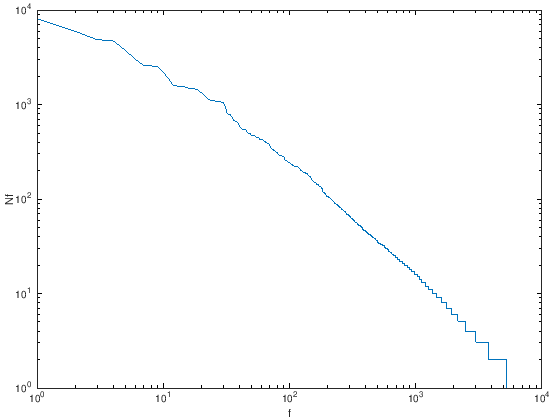

In [2]:
url = 'http://www.gutenberg.org/cache/epub/345/pg345.txt'; % DRACULA - Bram Stoker
system(cstrcat('wget -nv -q ', url,' -O /tmp/ulysses.txt'));
text = fileread ('/tmp/ulysses.txt');
text = tolower (text);
textclean = regexprep (text,'[^a-zA-Z]',' '); % regular expression to replace everything that is not [a-z] by whitespace
textlist = strsplit (textclean);
textlistsorted = sort (textlist);
words = unique (textlistsorted);
counts = cellfun (@(x) sum(ismember(textlistsorted,x)),words);
[counts, id] = sort(counts,'descend');
words = words(id);
loglog(sort(counts,'descend'));
xlabel('f'); ylabel('Nf');
N = 15;
topN = cellfun (@(x,y) cstrcat(x,' - ',y), words(1:N), strsplit(num2str (counts(1:N))), 'un', 0);
display (char(topN));

### Leitura sugerida:

Shannon, C. E., *Prediction and entropy of printed English*, Bell Systems Technical Journal, 30 (1), 1951

Cover, T. M., King, R. C., *A convergent gambling estimate of the entropy of English*, IEEE Transactions on Information Theory, 24 (4), 1978

Ferrer-i-Cancho, R., *Least effort and the origins of scaling in human language*, PNAS, 100 (3), 2003